# 岭回归
应用场景：数据的特征比样本点还多

岭回归即我们所说的L2正则线性回归，在一般的线性回归最小化均方误差的基础上增加了一个参数w的L2范数的罚项，从而最小化罚项残差平方和，简单说来，岭回归就是在普通线性回归的基础上引入单位矩阵。

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入λ来限制了所有w之和，通过引入该惩罚项，能够减少不重要的参数，这个技术在统计学中也可以叫做缩减（shrinkage）。

缩减方法可以去掉不重要的参数，因此能更好地裂解数据。此外，与简单的线性回归相比，缩减法能够取得更好的预测效果。

In [8]:
%matplotlib inline

In [10]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
def ridgeRegres(xMat, yMat, lam = 0.2):
    """
    函数说明:岭回归
    Parameters:
        xMat - x数据集
        yMat - y数据集
        lam - 缩减系数
    Returns:
        ws - 回归系数
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("矩阵为奇异矩阵,不能转置")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws
def ridgeTest(xArr, yArr):
    """
    函数说明:岭回归测试
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        wMat - 回归系数矩阵
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    #数据标准化
    yMean = np.mean(yMat, axis = 0)                        #行与行操作，求均值
    yMat = yMat - yMean                                    #数据减去均值
    xMeans = np.mean(xMat, axis = 0)                    #行与行操作，求均值
    xVar = np.var(xMat, axis = 0)                        #行与行操作，求方差
    xMat = (xMat - xMeans) / xVar                        #数据减去均值除以方差实现标准化
    numTestPts = 30                                        #30个不同的lambda测试
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))    #初始回归系数矩阵
    for i in range(numTestPts):                            #改变lambda计算回归系数
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10))    #lambda以e的指数变化，最初是一个非常小的数，
        wMat[i, :] = ws.T                                 #计算回归系数矩阵
    return wMat
def plotwMat():
    """
    函数说明:绘制岭回归系数矩阵
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    abX, abY = loadDataSet('abalone.txt')
    redgeWeights = ridgeTest(abX, abY)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(redgeWeights)    
    ax_title_text = ax.set_title(u'log(lambada)与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'log(lambada)', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 20, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()

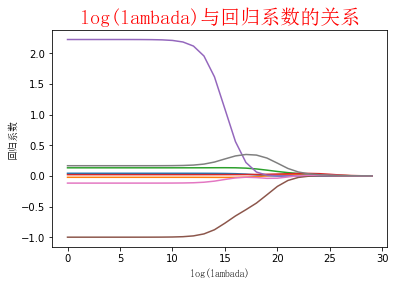

In [13]:
plotwMat()

图绘制了回归系数与log(λ)的关系。在最左边，即λ最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减成0；在中间部分的某个位置，将会得到最好的预测结果。想要得到最佳的λ参数，可以使用交叉验证的方式获得，

# 前向逐步线性回归

前向逐步线性回归算法属于一种贪心算法，即每一步都尽可能减少误差。我们计算回归系数，不再是通过公式计算，而是通过每次微调各个回归系数，然后计算预测误差。那个使误差最小的一组回归系数，就是我们需要的最佳回归系数。

In [14]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
 
def regularize(xMat, yMat):
    """
    函数说明:数据标准化
    Parameters:
        xMat - x数据集
        yMat - y数据集
    Returns:
        inxMat - 标准化后的x数据集
        inyMat - 标准化后的y数据集
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-23
    """    
    inxMat = xMat.copy()                                                        #数据拷贝
    inyMat = yMat.copy()
    yMean = np.mean(yMat, 0)                                                    #行与行操作，求均值
    inyMat = yMat - yMean                                                        #数据减去均值
    inMeans = np.mean(inxMat, 0)                                                   #行与行操作，求均值
    inVar = np.var(inxMat, 0)                                                     #行与行操作，求方差
    inxMat = (inxMat - inMeans) / inVar                                            #数据减去均值除以方差实现标准化
    return inxMat, inyMat
 
def rssError(yArr,yHatArr):
    """
    函数说明:计算平方误差
    Parameters:
        yArr - 预测值
        yHatArr - 真实值
    Returns:
        
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-23
    """
    return ((yArr-yHatArr)**2).sum()
def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    """
    函数说明:前向逐步线性回归
    Parameters:
        xArr - x输入数据
        yArr - y预测数据
        eps - 每次迭代需要调整的步长
        numIt - 迭代次数
    Returns:
        returnMat - numIt次迭代的回归系数矩阵
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-12-03
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T                                         #数据集
    xMat, yMat = regularize(xMat, yMat)                                                #数据标准化
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))                                                #初始化numIt次迭代的回归系数矩阵
    ws = np.zeros((n, 1))                                                            #初始化回归系数矩阵
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):                                                            #迭代numIt次
        # print(ws.T)                                                                    #打印当前回归系数矩阵
        lowestError = float('inf');                                                 #正无穷
        for j in range(n):                                                            #遍历每个特征的回归系数
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign                                                #微调回归系数
                yTest = xMat * wsTest                                                #计算预测值
                rssE = rssError(yMat.A, yTest.A)                                    #计算平方误差
                if rssE < lowestError:                                                #如果误差更小，则更新当前的最佳回归系数
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T                                                         #记录numIt次迭代的回归系数矩阵
    return returnMat
def plotstageWiseMat():
    """
    函数说明:绘制岭回归系数矩阵
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-20
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('abalone.txt')
    returnMat = stageWise(xArr, yArr, 0.005, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(returnMat)    
    ax_title_text = ax.set_title(u'前向逐步回归:迭代次数与回归系数的关系', FontProperties = font)
    ax_xlabel_text = ax.set_xlabel(u'迭代次数', FontProperties = font)
    ax_ylabel_text = ax.set_ylabel(u'回归系数', FontProperties = font)
    plt.setp(ax_title_text, size = 15, weight = 'bold', color = 'red')
    plt.setp(ax_xlabel_text, size = 10, weight = 'bold', color = 'black')
    plt.setp(ax_ylabel_text, size = 10, weight = 'bold', color = 'black')
    plt.show()

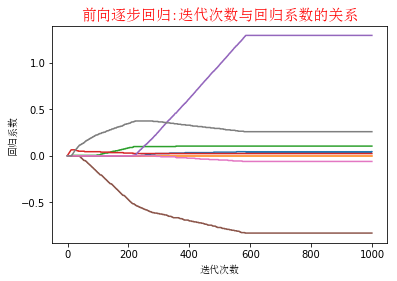

In [16]:
plotstageWiseMat()

可以看到，有些系数从始至终都是约为0的，这说明它们不对目标造成任何影响，也就是说这些特征很可能是不需要的。逐步线性回归算法的优点在于它可以帮助人们理解有的模型并做出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就有可能及时停止对那些不重要特征的收集。

# 总结
缩减方法（逐步线性回归或岭回归），就是将一些系数缩减成很小的值或者直接缩减为0。这样做，就增大了模型的偏差（减少了一些特征的权重），通过把一些特征的回归系数缩减到0，同时也就减少了模型的复杂度。消除了多余的特征之后，模型更容易理解，同时也降低了预测误差。但是当缩减过于严厉的时候，就会出现过拟合的现象，即用训练集预测结果很好，用测试集预测就糟糕很多。